<font size = 8>Gradient of Quadratic Cost

***

## Libraries & Stuff

In [ ]:
import numpy as np

In [1]:
import torch

In [ ]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math # for constant pi

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

In [1]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [2]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

In [1]:
# studies the regression model

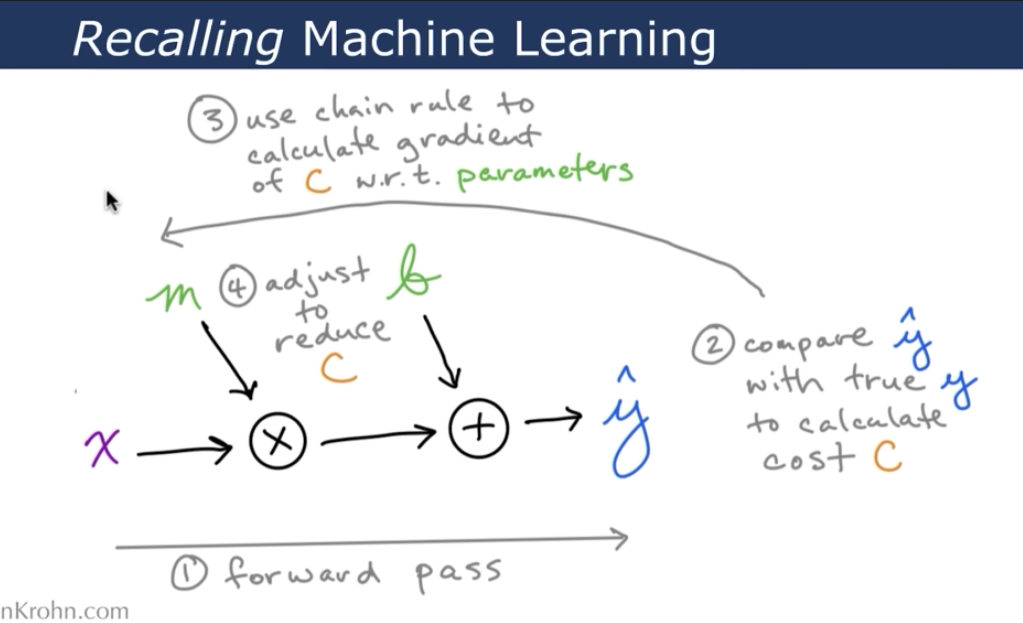

In [2]:
# step 1: forward pass : calculate a value of yhat

# step 2: compare yhat and y to calculat the cost function

# step 3: calculate gradient of C with respect to the parameters (autodiff)

# step 4: adjust the parameters (m and b) in order ot reduce cost

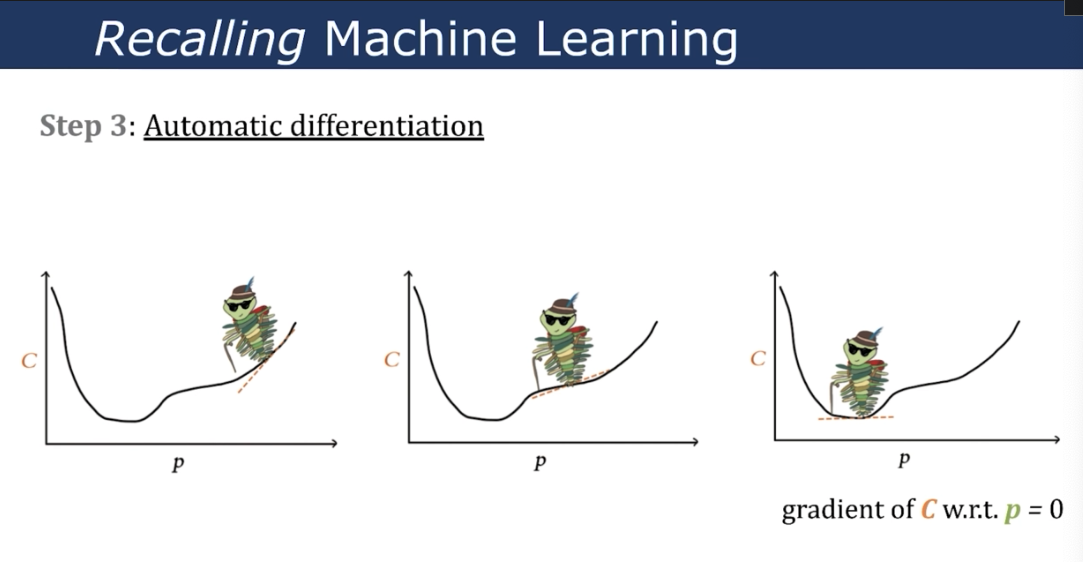

# Manually computing step 3 

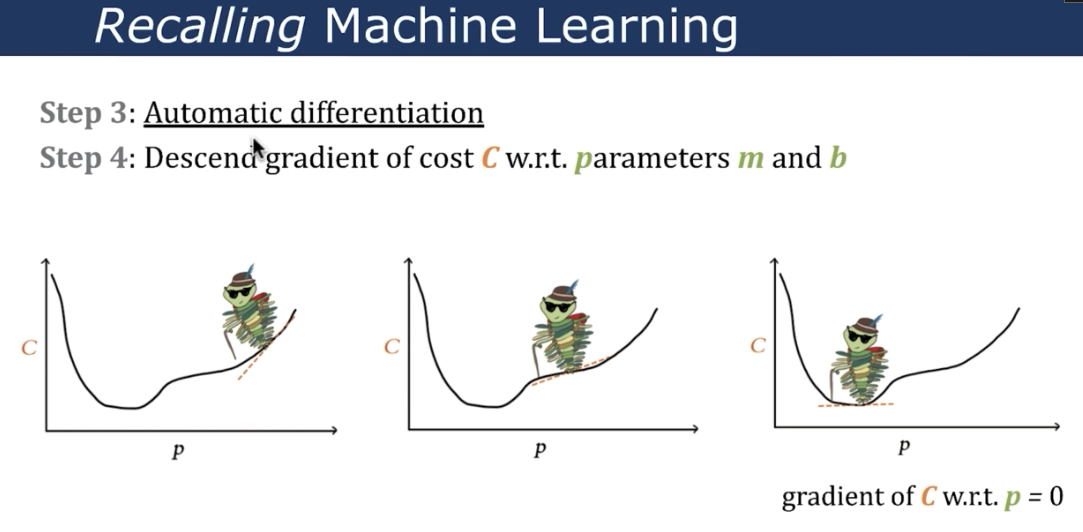

In [4]:
# step 3 calculates the gradient of the cost (ie slope)

# step 4: descent

In [5]:
# eventially we hope to find a place where the slope is 0

# thsi is usually the global minimum

***

In this notebook, we calculate the gradient of quadratic cost with respect to a straight-line regression model's parameters. We keep the partial derivatives as simple as possible by limiting the model to handling a single data point. 

In [10]:
# this is different form before

# quadratic cost -- NEW

In [2]:
xs = torch.tensor([0,1,2,3,4,5,6,7.])

# 8 input values

# drog dosage

In [3]:
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

# outcome

# how forgoetful the patients are after taking the drug

***

slope of a line is y = mx + b

In [4]:
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

initialize the values of m and b

In [5]:
m = torch.tensor([0.9]).requires_grad_()

In [6]:
b = torch.tensor([0.1]).requires_grad_()

***

To keep the partial derivatives as simple as possible, let's move forward with a single instance $i$ from the eight possible data points: 

In [19]:
# we are just picking one of the 8 data points

In [7]:
i = 7
x = xs[i]
y = ys[i]

In [21]:
x

tensor(7.)

In [22]:
y

tensor(-1.3700)

***

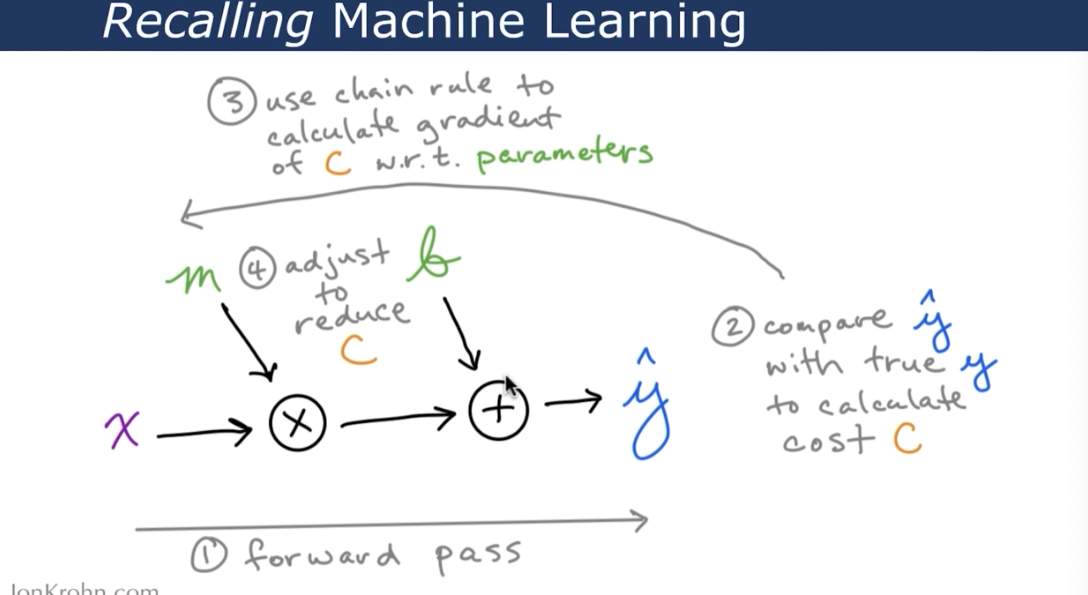

# Step 1 -- Forward Pass

We can flow the scalar tensor $x$ through our regression model to produce $\hat{y}$, an estimate of $y$. Prior to any model training, this is an arbitrary estimate:

In [8]:
yhat = regression(x, m, b)

In [9]:
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

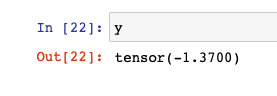

In [25]:
# note this is nowhere near the value we should be getting ie -1.37

# this is the training data

***

# Step 2 -- Calculate Cost C

In the *Regression in PyTorch* notebook, we used mean-squared error, which averages quadratic cost over multiple data points. With a single data point, here we can use quadratic cost alone. It is defined by: $$ C = (\hat{y} - y)^2 $$

In [26]:
# the cost calculation is simpler here because we are doing this for just a single point

In [10]:
def squared_error(my_yhat, my_y):
    return(my_yhat - my_y)**2

In [28]:
# squared is usd for two reasons

# 1 always have a positive value

# 2 if the gap is big, the squared difference is bigger -- exponential

In [11]:
C = squared_error(yhat, y)

In [12]:
C

tensor([60.3729], grad_fn=<PowBackward0>)

In [31]:
# cost of 60

***

# Step 3 -- Calculate Gradient of C wrt parameters

In [32]:
# first do this automaticlaly as earlier

In [21]:
C.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [35]:
m.grad

tensor([108.7800])

The partial derivative of $C$ with respect to $m$ ($\frac{\partial C}{\partial m}$) is: 

In [15]:
b.grad

tensor([15.5400])

And the partial derivative of $C$ with respect to $b$ ($\frac{\partial C}{\partial b}$) is: 

***

# We will now calculate this gradient manually

***

<font color = blue, size = 8> Chapter starts here

In [17]:
# cost function -- quadratic cost

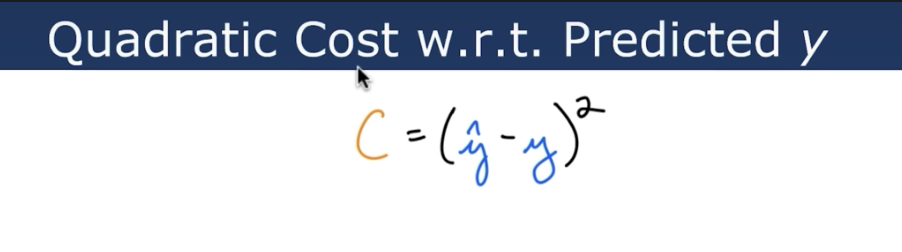

In [18]:
# we are not interested in du/dy -- not sure exactly why

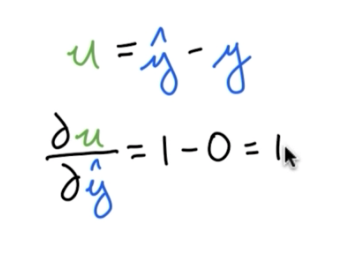

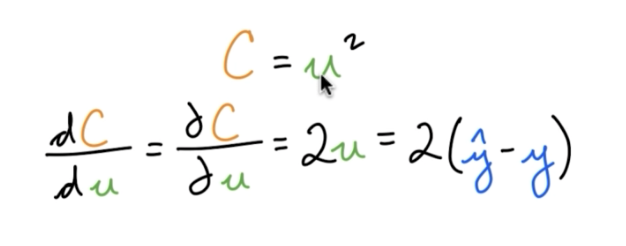

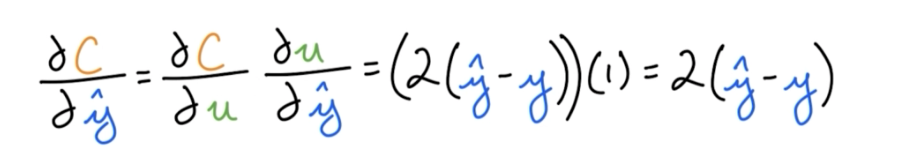

***

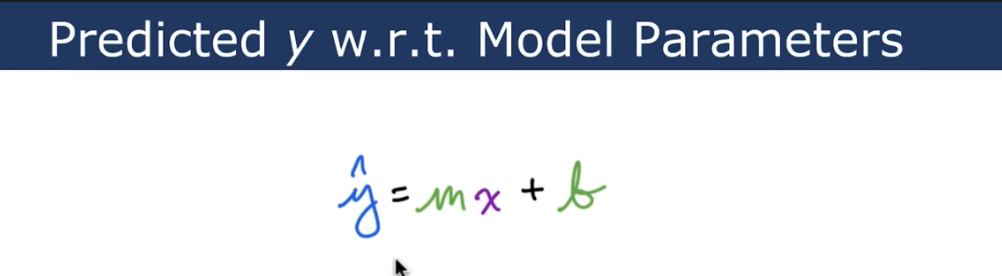

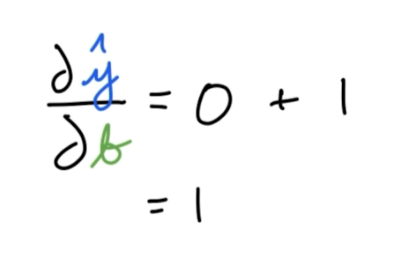

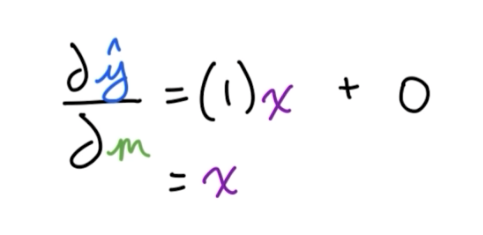

***

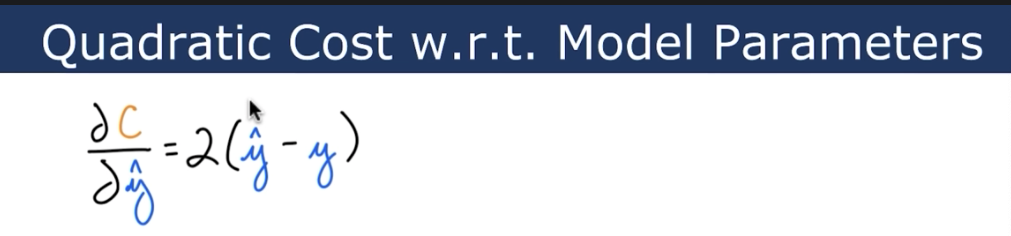

In [19]:
# the goal is to get dc / dm

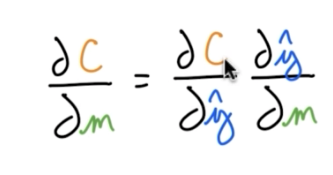

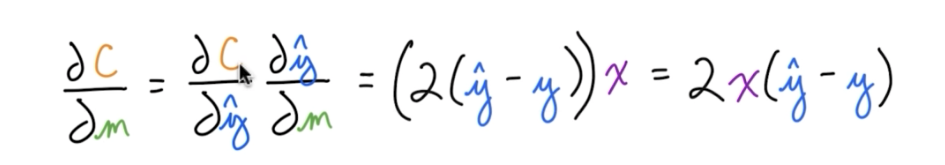

***

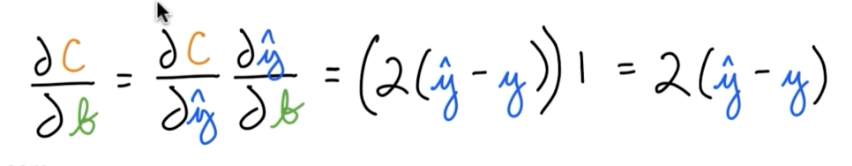

***

# Compare auto & manual values

## Autodiff

In [13]:
C.backward()

In [14]:
m.grad

tensor([108.7800])

In [15]:
b.grad

tensor([15.5400])

***

## Manual

$$ \frac{\partial C}{\partial m} = 2x(\hat{y} - y) $$

In [16]:
2*x*(yhat.item()-y)

tensor(108.7800)

$$ \frac{\partial C}{\partial b} = 2(\hat{y}-y) $$

In [17]:
2*(yhat.item()-y)

tensor(15.5400)

***

# Gradient of Cost C

## What does this mean?

The gradient of cost, which is symbolized $\nabla C$ (pronounced "nabla C"), is a vector of all the partial derivatives of $C$ with respect to each of the individual model parameters: 

$\nabla C = \nabla_p C = \left[ \frac{\partial{C}}{\partial{p_1}}, \frac{\partial{C}}{\partial{p_2}}, \cdots, \frac{\partial{C}}{\partial{p_n}} \right]^T $

In this case, there are only two parameters, $b$ and $m$: 

$\nabla C = \left[ \frac{\partial{C}}{\partial{b}}, \frac{\partial{C}}{\partial{m}} \right]^T $

# transpose is to make this a column vector

In [18]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T

In [19]:
gradient

tensor([[ 15.5400],
        [108.7800]])